#Этап 1. Изучение структуры датасета







In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
from pathlib import Path

# Определяем базовый каталог
BASE_DIR = Path('/content/drive/MyDrive/ml семестр 6/проект/')
BASE_DIR.mkdir(exist_ok=True, parents=True)

# Определяем пути к файлам и каталогам
TEST_KAGGLE_ZIP = Path('/content/drive/MyDrive/ml семестр 6/проект/test_kaggle')
TRAIN_ZIP = Path('/content/drive/MyDrive/ml семестр 6/проект/train')
PATH_TRAIN = BASE_DIR / 'train'
PATH_TEST = BASE_DIR / 'test_kaggle'
PATH_PROCESSED = BASE_DIR / 'processed'

# Меняем текущий рабочий каталог на BASE_DIR
os.chdir(BASE_DIR)


In [ ]:
!pip install py_essentials
!pip install googledrivedownloader

  Preparing metadata (setup.py) ... done
  Created wheel for py_essentials: filename=py_essentials-1.4.12-py3-none-any.whl size=6915 sha256=42903eac8a66528051ca52234d3ff709d82ec3cb461ebd4387be8218c1bb7717
  Stored in directory: /root/.cache/pip/wheels/d6/e0/3e/3e5d30b3f744bacda773940264b12aaa7473bd934f1df1b2f2
Successfully built py_essentials


In [ ]:
import os
from pathlib import Path
from google_drive_downloader import GoogleDriveDownloader as gdd

# Установка базового пути
BASE_DIR = Path('/content/drive/MyDrive/ml семестр 6/проект/')
BASE_DIR.mkdir(exist_ok=True, parents=True)

# Определение путей к файлам
TEST_KAGGLE_ZIP = BASE_DIR / 'test_kaggle.zip'
TRAIN_ZIP = BASE_DIR / 'train.zip'
PATH_TRAIN = BASE_DIR / 'train'
PATH_TEST = BASE_DIR / 'test_kaggle'
PATH_PROCESSED = BASE_DIR / 'processed'

# Переход в базовый каталог
os.chdir(BASE_DIR)

# Загрузка файлов с Google Drive
gdd.download_file_from_google_drive(file_id='15tHAFc2On8-2s0nGAlfAvr9ltZepgtsU',
                                    dest_path=str(TRAIN_ZIP), unzip=False)
gdd.download_file_from_google_drive(file_id='1-4z1xlNBWGtOO6cnQUEM1Jo70Z2Zk3NX',
                                    dest_path=str(TEST_KAGGLE_ZIP), unzip=False)

# Проверка, существуют ли загруженные файлы
print(f"Train file exists: {TRAIN_ZIP.exists()}")
print(f"Test file exists: {TEST_KAGGLE_ZIP.exists()}")

# Распаковка загруженных файлов
if TRAIN_ZIP.exists():
    os.system(f"unzip -q {TRAIN_ZIP}")

if TEST_KAGGLE_ZIP.exists():
    os.system(f"unzip -q {TEST_KAGGLE_ZIP}")


Train file exists: True
Test file exists: True


# Изучение структуры датасета

In [ ]:
total = 0
print('\033[1m' + 'TRAIN:')
print('\033[0m')
folders = ([name for name in os.listdir(PATH_TRAIN)
            if os.path.isdir(os.path.join(PATH_TRAIN, name))])
for folder in folders:
    contents = os.listdir(os.path.join(PATH_TRAIN,folder))
    print('   Эмоция:',folder,', файлов:',len(contents))
    total += len(contents)

print('\nДиректория TRAIN содержит:',total,'файлов / в',len(os.listdir(PATH_TRAIN)),'категориях.\n')
print('\033[1m' + 'TEST:')
print('\033[0m')
print('Директория TEST содержит:',len(os.listdir(PATH_TEST)),'файлов.')


TRAIN:

   Эмоция: surprise , файлов: 6343
   Эмоция: anger , файлов: 7023
   Эмоция: happy , файлов: 5965
   Эмоция: fear , файлов: 5274
   Эмоция: uncertain , файлов: 5927
   Эмоция: neutral , файлов: 7095
   Эмоция: disgust , файлов: 3155
   Эмоция: sad , файлов: 6750
   Эмоция: contempt , файлов: 3085

Директория TRAIN содержит: 50617 файлов / в 9 категориях.

TEST:

Директория TEST содержит: 5000 файлов.


In [ ]:
from PIL import Image, ImageEnhance, ImageOps, ImageDraw, ImageFilter

In [ ]:
!pip install py_essentials
from py_essentials import hashing as hs

In [ ]:
idx = 0
size_images = dict()
for folder in folders:
  folder_images = PATH_TRAIN/folder
  for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            weight = os.path.getsize(image)
            width, heigth = img.size
            hash_object = hs.fileChecksum(image, "sha256")
            size_images[idx] = {'weight': weight,
                                'width': width,
                                'heigth': heigth,
                                'emotion' : folder,
                                'filename': path_image,
                                'hash': hash_object}
            idx += 1
df_train = pd.DataFrame(size_images).T
df_train = df_train.astype({'width': int, 'heigth': int})
df_train['notsquare'] = abs(df_train['heigth'] - df_train['width'])

#сохраним полученный датафрейм в csv-файл
df_train.to_csv(BASE_DIR/'df_train.csv', sep=',', index_label='index')

In [12]:
import seaborn as sns

In [24]:
df_train=pd.read_csv('/content/drive/MyDrive/ml семестр 6/проект/df_train.csv', sep=',')

In [18]:
df_train.head()

,index,weight,width,heigth,emotion,filename,hash,notsquare,lvalueld
0,45318,3059,209,209,sad,2285.jpg,1b99556874277005a9031de8fc7a82962625071ec992d0...,0,10.939264
1,21960,7878,379,379,fear,2803.jpg,9178043592bf422b34aaaa04a430681e854d9b682503d9...,0,11.865651
2,19812,3039,192,192,fear,4569.jpg,b07f20367ecfb0fabb6dc8ebd58e971c7c483c8ba16954...,0,12.455973
3,5815,15959,675,675,surprise,1152.jpg,2bd4b0d20cba4f5cadde1e6f0a962f69473d0a538407c4...,0,12.743730
4,20587,15547,616,616,fear,3409.jpg,0f3850caea2f6397ee3babb374441829b978825b13c4a8...,0,13.185115


Базовые метрики размеров изображений набора TRAIN:
count    50617.000000
mean       523.536737
std        425.853610
min        133.000000
25%        247.000000
50%        371.000000
75%        660.000000
max       4689.000000
Name: heigth, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
heigth
256    295
183    292
186    283
188    276
192    269
Name: count, dtype: int64
------------------------------------

Все изображения имеют квадратную форму, кроме 43 шт:


,index,weight,width,heigth,emotion,filename,hash,notsquare,lvalueld
43728,18437,164657,1778,1231,happy,72.jpg,80e5e9a6a56a7fd8891d99e318c351faddc8f98fec82b0...,547,152.052974
36767,50450,144128,1632,1180,contempt,1005.jpg,088f8f442b52450e0632f93c6f5267140dba272600adbd...,452,135.128500
30488,16475,221887,1562,1857,happy,2074.jpg,b1c4d31e07c0595b7fd6292ca96bf441fb7e994fec2978...,295,123.647716
48402,25272,35117,486,347,uncertain,5595.jpg,81453040a62299ecba3927bdab3c34161584d9c95d018b...,139,174.034280
13909,4667,12223,352,253,surprise,2002.jpg,777f8568f81b9a9def3cd1f95e08df604411fad63be9c4...,99,96.294017


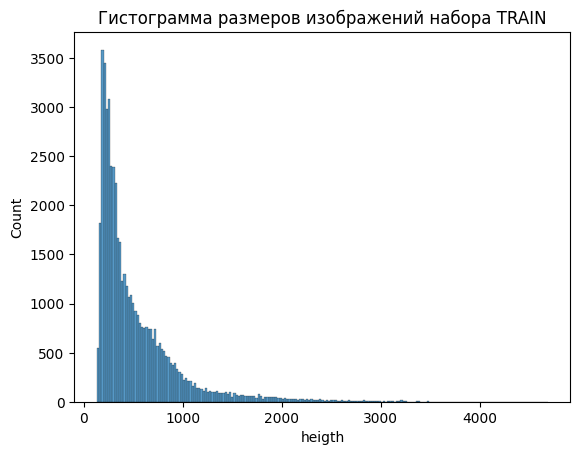

In [19]:
sns.histplot(df_train['heigth'])
plt.title('Гистограмма размеров изображений набора TRAIN')

print("Базовые метрики размеров изображений набора TRAIN:")
print(df_train['heigth'].describe())
print("------------------------------------")

print("Самые популярные значения метрики, топ 5")
print(df_train['heigth'].value_counts().nlargest(5))
print("------------------------------------")
print('\nВсе изображения имеют квадратную форму, кроме',df_train[df_train['notsquare'] != 0]['notsquare'].count(),'шт:')
df_train[df_train['notsquare'] != 0].sort_values('notsquare', ascending = False).head()

In [20]:
import matplotlib.image as mpimg
from tqdm import tqdm

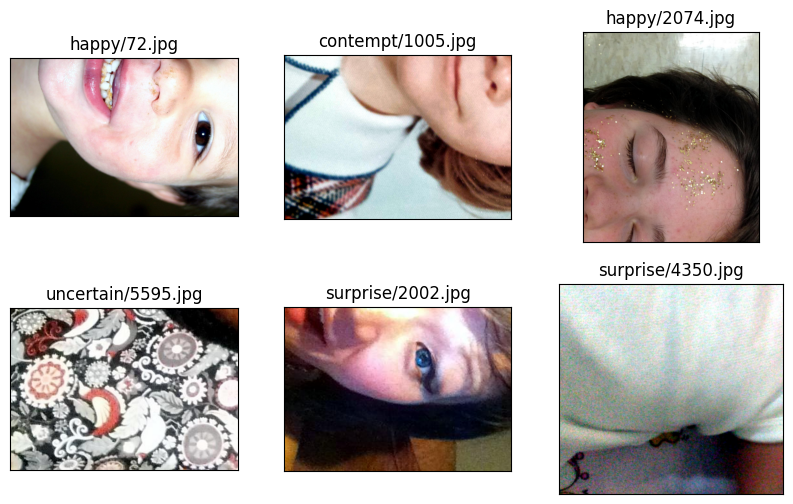

In [21]:
image_list = df_train[df_train['notsquare'] != 0].sort_values('notsquare', ascending = False)['filename'].tolist()
emotion_list = df_train[df_train['notsquare'] != 0].sort_values('notsquare', ascending = False)['emotion'].tolist()
plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(emotion_list[i] + str('/') + image_list[i])
    plt.grid(False)
    image_path = str(PATH_TRAIN) + str('/') + str(emotion_list[i]) + str('/') + str(image_list[i])
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap=plt.cm.gray)

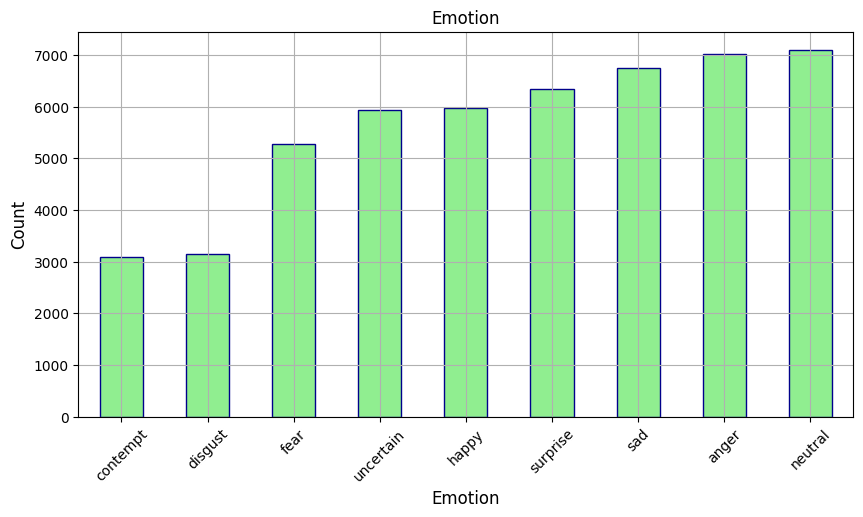

In [22]:
df_train = pd.read_csv(BASE_DIR/'df_train.csv', sep=',', index_col='index')
df_train_group = df_train.groupby('emotion').agg({'filename': 'count'}).sort_values('filename', ascending = True)
df_train_group['emotion'] = df_train_group.index
ax = df_train_group[['emotion','filename']].plot(kind='bar', title ="Emotion",
                                                      figsize=(10, 5), legend=False, rot = 45,
                                                      fontsize = 10, color = 'lightgreen',
                                                      edgecolor = 'darkblue',linewidth = 1)
ax.set_xlabel("Emotion", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.grid()
plt.show()

In [ ]:
folder_images = PATH_TEST
size_images = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            weight = os.path.getsize(image)
            width, heigth = img.size
            size_images[path_image] = {'weight': weight, 'width': width, 'heigth': heigth}

df_test = pd.DataFrame(size_images).T
df_test['notsquare'] = abs(df_test['heigth'] - df_test['width'])
df_test['image_path'] = df_test.index
#сохраним полученный датафрейм в csv-файл
df_test.to_csv(BASE_DIR/'df_test.csv', sep=',', index_label='index')

In [25]:
df_test=pd.read_csv('/content/drive/MyDrive/ml семестр 6/проект/df_test.csv', sep=',')

In [26]:
df_test.head()

,index,weight,width,heigth,notsquare,image_path
0,4004.jpg,91362,1068,1068,0,4004.jpg
1,4003.jpg,8004,194,194,0,4003.jpg
2,4034.jpg,9322,204,204,0,4034.jpg
3,4033.jpg,12983,261,261,0,4033.jpg
4,4002.jpg,13682,304,304,0,4002.jpg


Базовые метрики изображений ТЕСТового набора:
count    5000.000000
mean      523.301600
std       413.952547
min       135.000000
25%       248.000000
50%       379.000000
75%       668.000000
max      3709.000000
Name: heigth, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
heigth
256    34
194    32
183    32
187    31
231    31
Name: count, dtype: int64
------------------------------------

Все изображения имеют квадратную форму, кроме 2 - х:
158, 4980



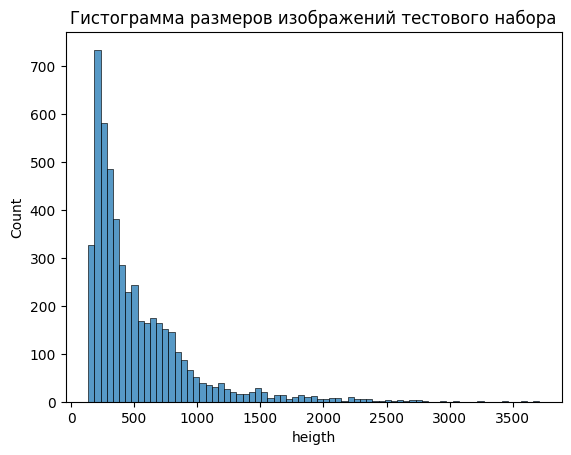

In [27]:
sns.histplot(df_test['heigth'])
plt.title('Гистограмма размеров изображений тестового набора')

print("Базовые метрики изображений ТЕСТового набора:")
print(df_test['heigth'].describe())
print("------------------------------------")

print("Самые популярные значения метрики, топ 5")
print(df_test['heigth'].value_counts().nlargest(5))
print("------------------------------------")
print('\nВсе изображения имеют квадратную форму, кроме',df_test[df_test['notsquare'] != 0]['notsquare'].count(),'- х:')
print(*df_test[df_test['notsquare'] != 0].index.tolist(),sep=', ',end='\n\n')

#Итог по проведенному анализу
1. Датасет содержит повторения, хотя они и относятся к разным эмоциям, все равно необходимо их удалить.
2. Категории распределены не равномерно: заметный недостаток лиц в категориях contempt и disgust.

В этом блоке удаляем изображения-дубликаты

In [31]:
from pathlib import Path
BASE_DIR = Path('/content/drive/MyDrive/ml семестр 6/проект/')
BASE_DIR.mkdir(exist_ok=True, parents=True)

In [32]:
df_train = pd.read_csv(BASE_DIR/'df_train.csv', sep=',', index_col='index')

In [33]:
df_clean = df_train[~df_train.duplicated(subset = ['hash'], keep = 'first')].copy()
df_clean = df_clean.groupby('hash').agg({'emotion': 'nunique', 'filename' : 'nunique'})
assert sum(set(df_clean.emotion.tolist())) == 1
assert sum(set(df_clean.filename.tolist())) == 1
print('Дубликаты изображений удалены успешно. Удалено', 50046 - df_clean.shape[0],'записей о файлах.\n')
df_train = df_train.loc[~df_train.duplicated(subset = ['hash'], keep = 'first')]
df_train.reset_index(drop=True, inplace=True)
df_train.drop(['hash'], axis=1, inplace=True)
df_train

Дубликаты изображений удалены успешно. Удалено 736 записей о файлах.



<ipython-input-33-3044d6b16a3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['hash'], axis=1, inplace=True)


,weight,width,heigth,emotion,filename,notsquare,lvalueld
0,3059,209,209,sad,2285.jpg,0,10.939264
1,7878,379,379,fear,2803.jpg,0,11.865651
2,3039,192,192,fear,4569.jpg,0,12.455973
3,15959,675,675,surprise,1152.jpg,0,12.743730
4,15547,616,616,fear,3409.jpg,0,13.185115
...,...,...,...,...,...,...,...
49305,175140,1514,1514,neutral,548.jpg,0,225.409093
49306,71626,951,951,fear,1036.jpg,0,226.492290
49307,11845,466,466,surprise,5633.jpg,0,230.773186
49308,8148,334,334,surprise,635.jpg,0,231.220822
